# FIT5202 - Data Processing for Big Data S2 2021 
# Assessment 2B-Task2: Flight Consumer


Student information
- Family Name: Aggarwal
- Given Name: Naval
- Student ID: 31153054
- Student email: nagg0001@student.monash.edu

### Import Libraries

In [1]:
from time import sleep
from kafka import KafkaConsumer
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
import time

# To display inline graphs in Jupyter Notebook
%matplotlib notebook

### Analysing and Creating Consumer

In [2]:
def connect_kafka_consumer():
    
    topic = 'flightTopic' 
    
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000,
                                   auto_offset_reset='earliest',
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer


In [3]:
def init_plots():
    try:
        width = 10
        height = 7
        fig = plt.figure(figsize=(width,height))
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Count')
        fig.suptitle('Visualization of total records per two minutes')
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))


In [4]:
day_list = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# This method is used in creating a dictionary to access the count of flights records each day
def getCountFlightRecords(data):
    countFlightRecords = dict()
    
    for i in range(1, 8):
        # Filtering the records based on day
        countFlightRecords[i] =  len(list(filter(lambda y: y['DAY_OF_WEEK'] == i, data)))
        
        # todo this can be uncommented to check the number of records recieving per batch
        # Printing the length of records for MONDAY, TUESDAY and WEDNESDAY  
#         print("Records on ", day_list[i-1], " are ",  countFlightRecords[i])
        
    return countFlightRecords
    

In [5]:
def getDataFromConsumer(consumer, fig, ax1):
    try:
        #Creating data list
        data = [] 
        ts = []
        y_axis_monday = []
        y_axis_tuesday = []
        y_axis_wednesday = []
        
        stored_time = 0

    
        for message in consumer:
            # Updating the data list
            data.extend(json.loads(message.value.decode('UTF-8')))
            
            curr_time = datetime.now().time().strftime("%M")

            check_condition = int(curr_time) - int(stored_time) 
            # Visualisation of graph is done only after 2 mins
            while(True):
                
                # Creating a dictionary to access the count of flights records each day
                countFlightRecords = getCountFlightRecords(data)
                
                
                # Storing the current time of display
                stored_time = datetime.now().time().strftime("%M")
            
                # Updating the timestamp axis
                ts.append(stored_time)

                ax1.clear()
                    
                y_axis_monday.append(countFlightRecords[1])
                ax1.plot(ts, y_axis_monday, "-r", label="MONDAY")
                y_axis_tuesday.append(countFlightRecords[2])
                ax1.plot(ts, y_axis_tuesday,"-b", label="TUESDAY")
                y_axis_wednesday.append(countFlightRecords[3])
                ax1.plot(ts, y_axis_wednesday, "-y", label="WEDNESDAY")
                
                fig.suptitle('Visualization of total records per two minutes')
                ax1.set_xlabel('Time')
                ax1.set_ylabel('Value')
                
                
                ax1.legend(loc="upper left")
                fig.canvas.draw()
                
                time.sleep(2)

        plt.close('all')


    except Exception as ex:
        print(str(ex))

<IPython.core.display.Javascript object>


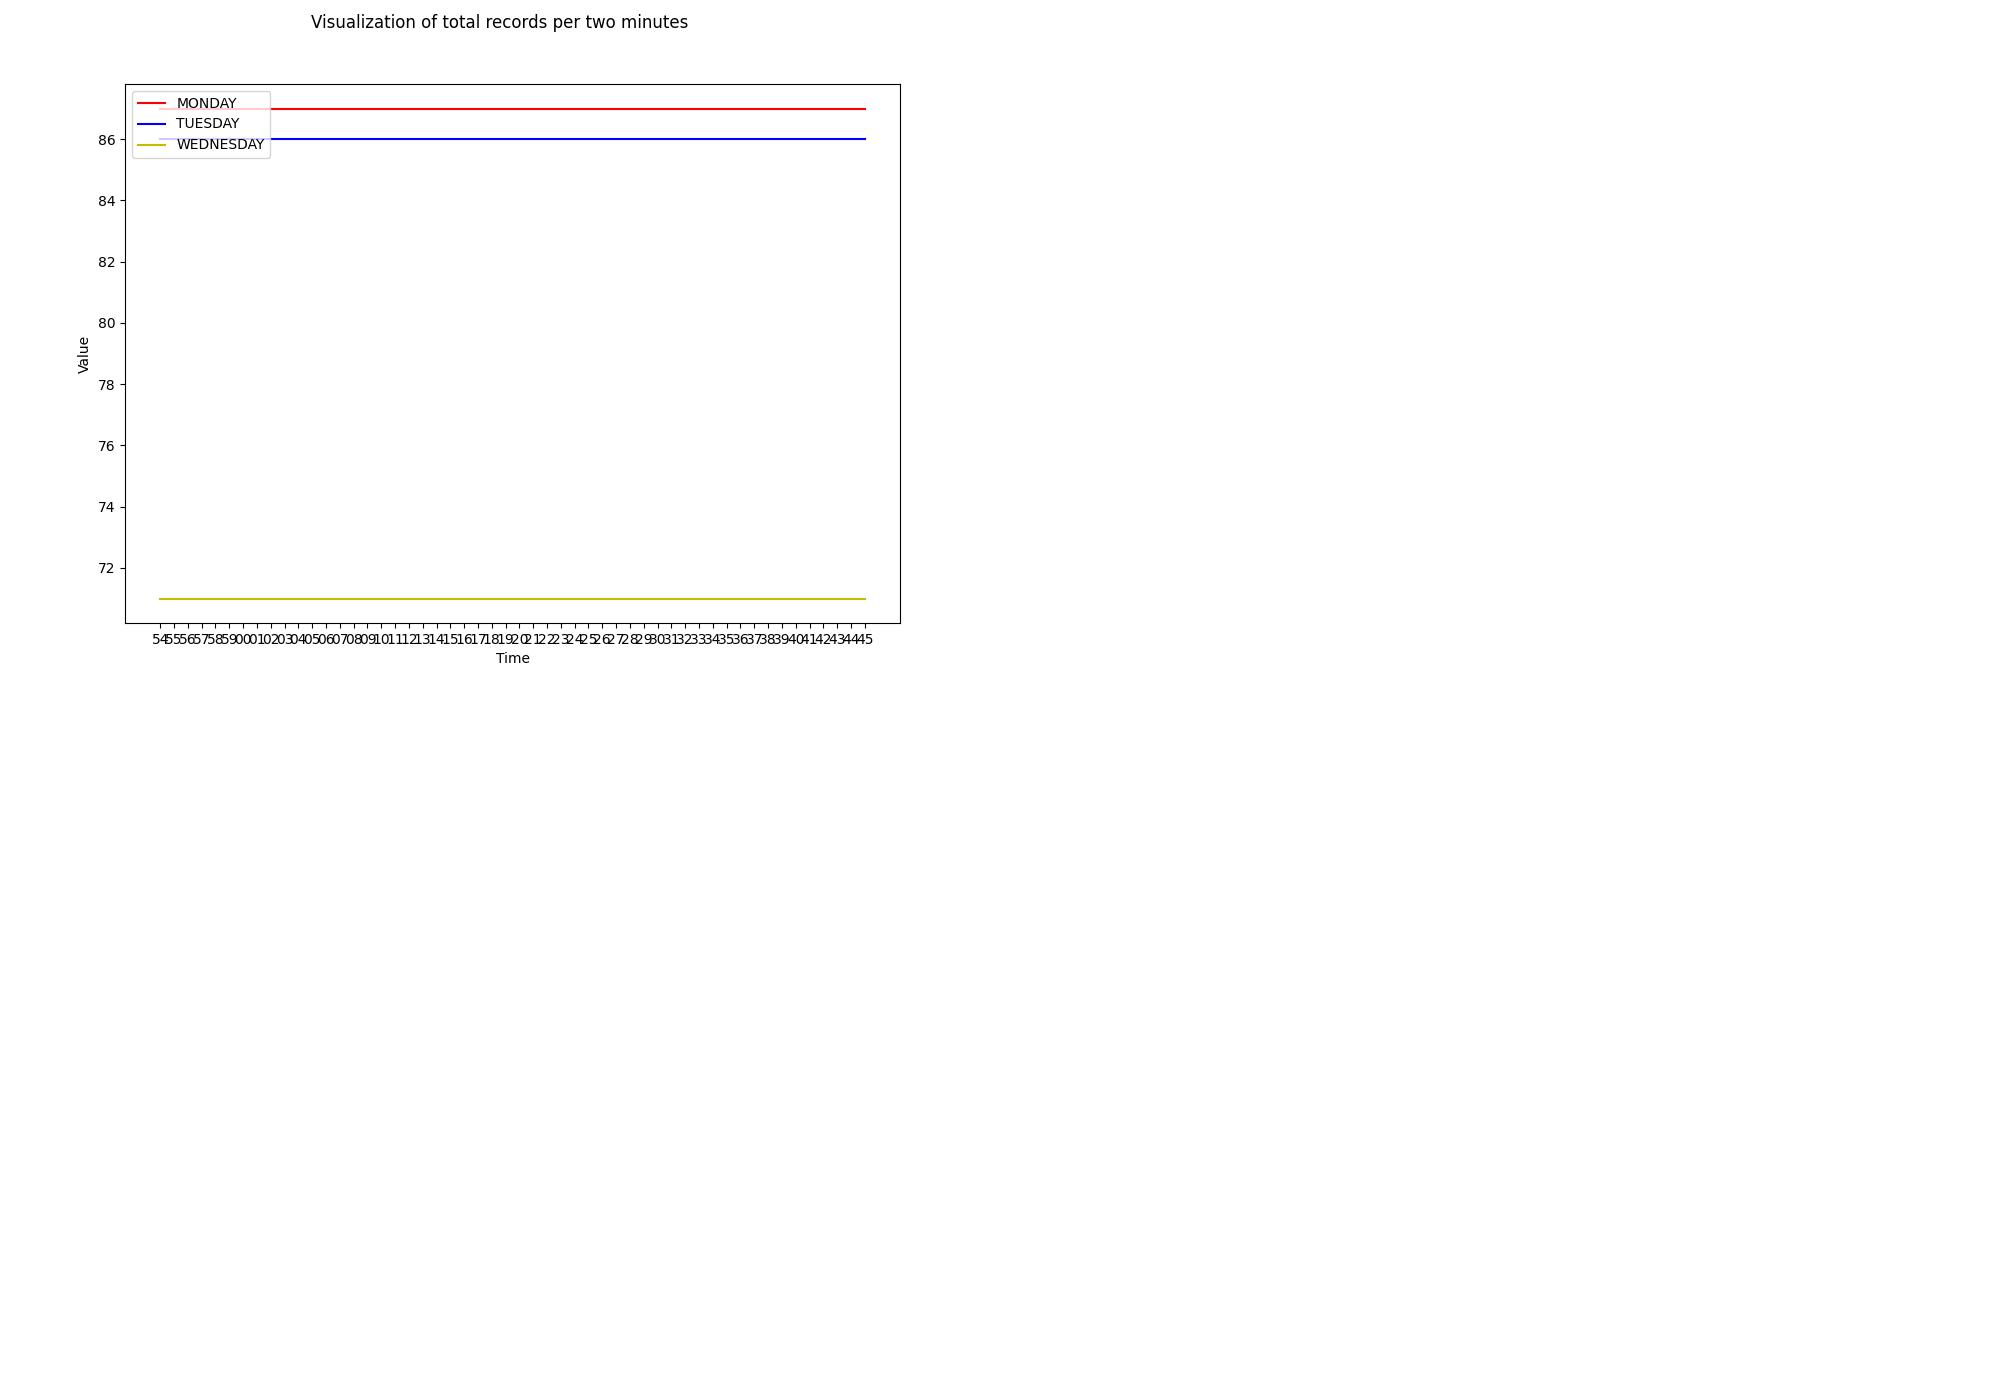

In [ ]:
if __name__ == '__main__': 

    consumer = connect_kafka_consumer()
    # Creating initialised plot
    fig, ax1 = init_plots()
    
    getDataFromConsumer(consumer, fig, ax1)